In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!unzip "/content/drive/MyDrive/DS/deep_learning/Project/hurricane.zip"

Archive:  /content/drive/MyDrive/DS/deep_learning/Project/hurricane.zip
replace __MACOSX/._hurricane? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [3]:
import os
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from PIL import Image
import tensorflow as tf

In [4]:
datasetPath='hurricane'
os.listdir(datasetPath)

def print_file_sizes(input_path, subset):
    print('{}:'.format(subset))
    print('')
    path = input_path + '/'+ subset + '/'
    for f in os.listdir(path):
        if not os.path.isdir(path + f):
            print(f.ljust(30) + str(round(os.path.getsize(path + f) / 1000000, 2)) + 'MB')
        else:
            sizes = [os.path.getsize(path+f+'/'+x)/1000000 for x in os.listdir(path + f)]
            print(f.ljust(30) + str(round(sum(sizes), 2)) + 'MB' + ' ({} files)'.format(len(sizes)))
    print('')

print_file_sizes(datasetPath, 'train')
print_file_sizes(datasetPath, 'valid')
print_file_sizes(datasetPath, 'test')

train:

damage                        14.14MB (5627 files)
no_damage                     15.94MB (5294 files)

valid:

damage                        2.52MB (1000 files)
no_damage                     3.02MB (1000 files)

test:

damage                        20.12MB (8000 files)
no_damage                     3.01MB (1000 files)



In [5]:
image_df = pd.DataFrame({'path': list(Path(datasetPath).glob('**/*.jp*g'))})

image_df['damage'] = image_df['path'].map(lambda x: x.parent.stem)
image_df['data_split'] = image_df['path'].map(lambda x: x.parent.parent.stem)
image_df['location'] = image_df['path'].map(lambda x: x.stem)
image_df['lon'] = image_df['location'].map(lambda x: float(x.split('_')[0]))
image_df['lat'] = image_df['location'].map(lambda x: float(x.split('_')[-1]))
image_df['path'] = image_df['path'].map(lambda x: str(x)) # convert the path back to a string

image_df.head()

,path,damage,data_split,location,lon,lat
0,hurricane/valid/damage/-95.60065300000001_29.7...,damage,valid,-95.60065300000001_29.757259,-95.600653,29.757259
1,hurricane/valid/damage/-93.980263_29.898518.jpeg,damage,valid,-93.980263_29.898518,-93.980263,29.898518
2,hurricane/valid/damage/-93.99913199999999_29.8...,damage,valid,-93.99913199999999_29.890821000000003,-93.999132,29.890821
3,hurricane/valid/damage/-96.91589599999999_28.7...,damage,valid,-96.91589599999999_28.745410999999997,-96.915896,28.745411
4,hurricane/valid/damage/-96.99250699999999_28.8...,damage,valid,-96.99250699999999_28.823045,-96.992507,28.823045


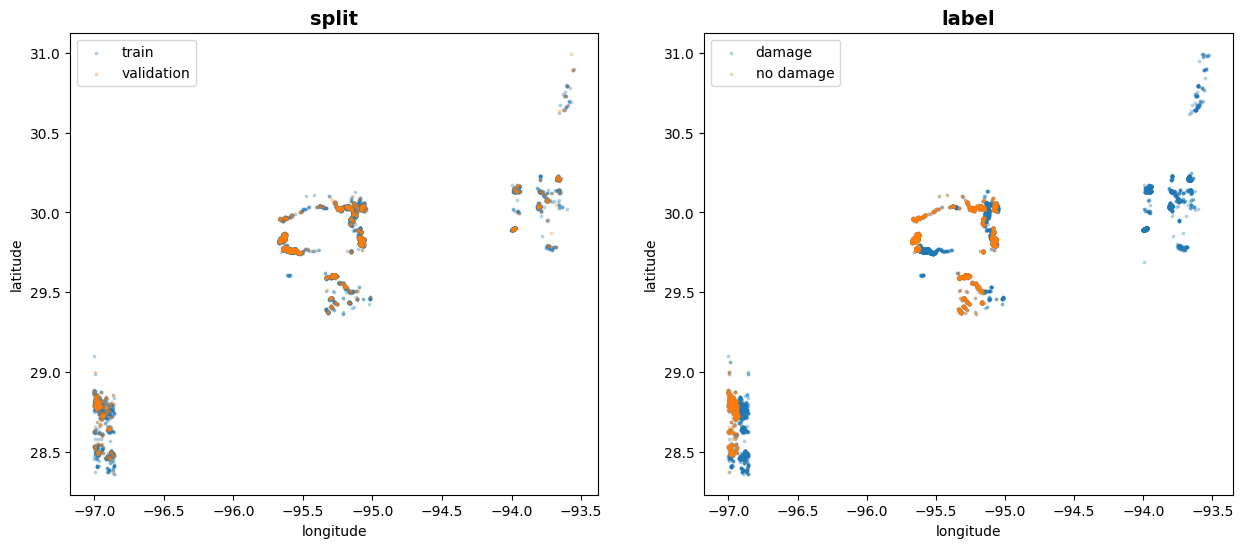

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,6))

s = 3
alpha = 0.25

# get the train-validation-test splits
image_df_train = image_df[image_df['data_split']=='train'].copy()
image_df_val = image_df[image_df['data_split']=='valid'].copy()
image_df_test = image_df[image_df['data_split']=='test'].copy()

# sort to ensure reproducible behaviour
image_df_train.sort_values('lat', inplace=True)
image_df_val.sort_values('lat', inplace=True)
image_df_test.sort_values('lat', inplace=True)
image_df_train.reset_index(drop=True,inplace=True)
image_df_val.reset_index(drop=True,inplace=True)
image_df_test.reset_index(drop=True,inplace=True)

ax[0].scatter(image_df_train['lon'], image_df_train['lat'], color='C0', s=s, alpha=alpha, label='train')
ax[0].scatter(image_df_val['lon'], image_df_val['lat'], color='C1', s=s, alpha=alpha, label='validation')

ax[0].set_title('split', fontsize=14, fontweight='bold')
ax[0].legend()
ax[0].set_xlabel('longitude')
ax[0].set_ylabel('latitude')

image_df_dmg = image_df[image_df['damage']=='damage'].copy()
image_df_nodmg = image_df[image_df['damage']=='no_damage'].copy()

image_df_dmg.reset_index(drop=True,inplace=True)
image_df_nodmg.reset_index(drop=True,inplace=True)

ax[1].scatter(image_df_dmg['lon'], image_df_dmg['lat'], color='C0', s=s, alpha=alpha, label='damage')
ax[1].scatter(image_df_nodmg['lon'], image_df_nodmg['lat'], color='C1', s=s, alpha=alpha, label='no damage')

ax[1].set_title('label', fontsize=14, fontweight='bold')
ax[1].legend()
ax[1].set_xlabel('longitude')
ax[1].set_ylabel('latitude')

plt.show(fig)

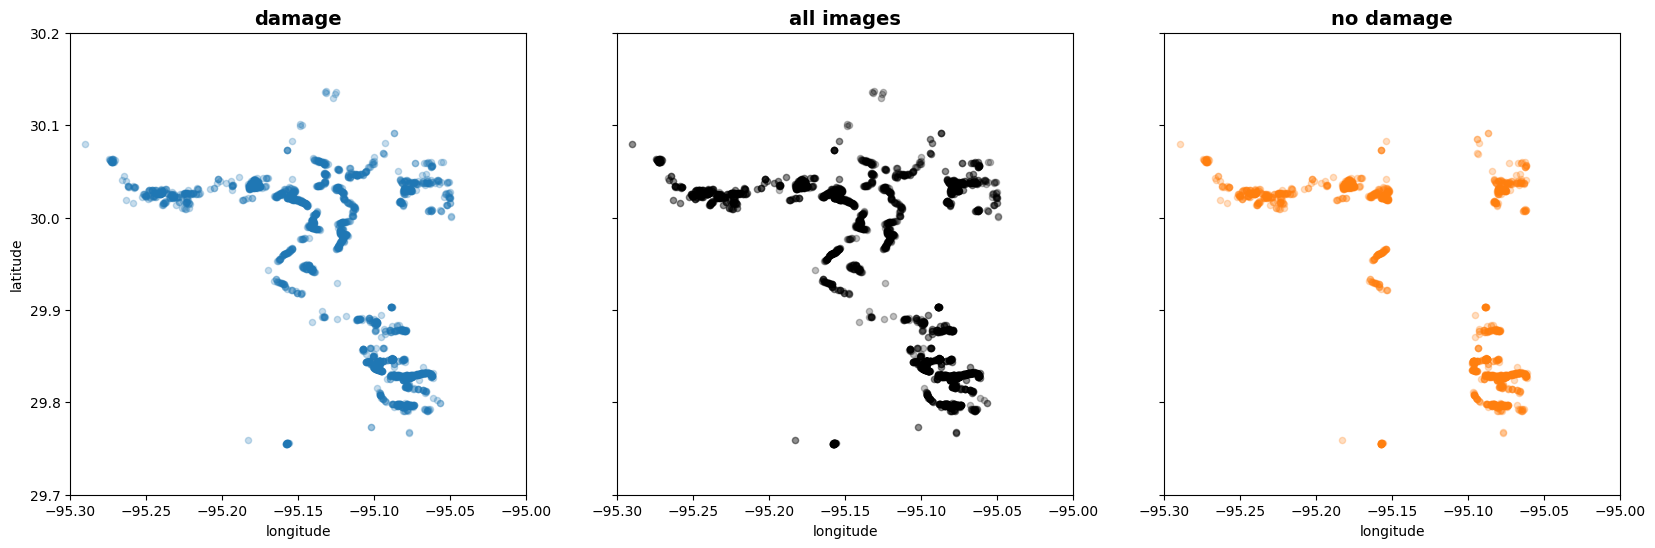

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,6), sharex=True, sharey=True)

s = 20
alpha = 0.25

ax[0].scatter(image_df_dmg['lon'], image_df_dmg['lat'], color='C0', s=s, alpha=alpha, label='damage')
ax[0].set_title('damage', fontsize=14, fontweight='bold')

ax[1].scatter(image_df_dmg['lon'], image_df_dmg['lat'], color='k', s=s, alpha=alpha, label='damage')
ax[1].scatter(image_df_nodmg['lon'], image_df_nodmg['lat'], color='k', s=s, alpha=alpha, label='no damage')
ax[1].set_title('all images', fontsize=14, fontweight='bold')

ax[2].scatter(image_df_nodmg['lon'], image_df_nodmg['lat'], color='C1', s=s, alpha=alpha, label='no damage')
ax[2].set_title('no damage', fontsize=14, fontweight='bold')

ax[0].set_ylabel('latitude')
ax[0].set_xlabel('longitude')
ax[1].set_xlabel('longitude')
ax[2].set_xlabel('longitude')

ax[0].set_xlim(-95.3,-95)
ax[0].set_ylim(29.7,30.2)

plt.show(fig)

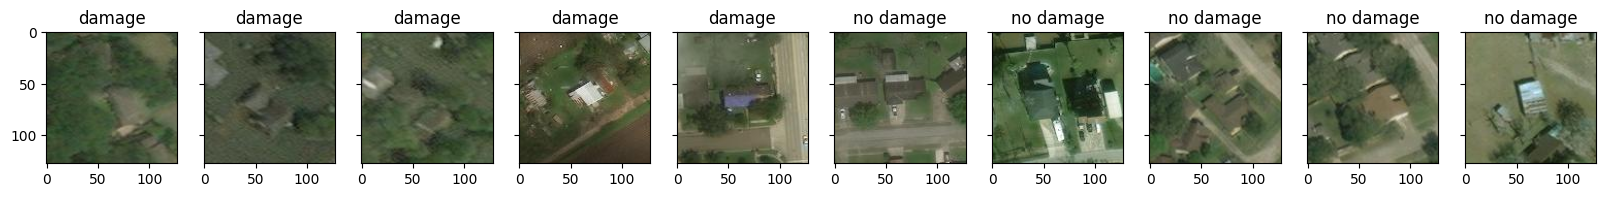

In [8]:
import cv2

fig, ax = plt.subplots(nrows=1, ncols=10, sharex=True, sharey=True, figsize=(20,10))

ax = ax.flatten()

for i in range(5):
    img = cv2.imread(image_df_dmg['path'][i], cv2.IMREAD_UNCHANGED)
    ax[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[i].set_title('damage')

for i in range(5,10):
    img = cv2.imread(image_df_nodmg['path'][i], cv2.IMREAD_UNCHANGED)
    ax[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[i].set_title('no damage')

plt.show()

In [9]:
#paths
train_path = image_df_train['path'].copy().values
val_path = image_df_val['path'].copy().values
test_path = image_df_test['path'].copy().values


# labels
train_labels = np.zeros(len(image_df_train), dtype=np.int8)
train_labels[image_df_train['damage'].values=='damage'] = 1

val_labels = np.zeros(len(image_df_val), dtype=np.int8)
val_labels[image_df_val['damage'].values=='damage'] = 1

test_labels = np.zeros(len(image_df_test), dtype=np.int8)
test_labels[image_df_test['damage'].values=='damage'] = 1

In [10]:
train_ds = tf.data.Dataset.from_tensor_slices((train_path, train_labels))
val_ds = tf.data.Dataset.from_tensor_slices((val_path, val_labels))
test_ds = tf.data.Dataset.from_tensor_slices((test_path, test_labels))

# look at a few images and their labels
for path, label in train_ds.take(5):
    print("path  : ", path.numpy().decode('utf-8'))
    print("label : ", label.numpy())

path  :  hurricane/train/damage/-96.860867_28.363774.jpeg
label :  1
path  :  hurricane/train/damage/-96.861175_28.36379.jpeg
label :  1
path  :  hurricane/train/damage/-96.90534699999999_28.375241.jpeg
label :  1
path  :  hurricane/train/damage/-96.90485699999999_28.375248.jpeg
label :  1
path  :  hurricane/train/damage/-96.905101_28.375287.jpeg
label :  1


In [11]:
# this function wraps `cv2.imread` to get a string of the path.
def cv2_imread(path, label):
    # read in the image, getting the string of the path
    img = cv2.imread(path.numpy().decode('utf-8'), cv2.IMREAD_UNCHANGED)
    # change from BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img, label

# this function assumes that the image has been read in, and does some transformations on it
def tf_cleanup(img, label):
    # convert to Tensor
    img = tf.convert_to_tensor(img)
    # unclear why, but the jpeg is read in as uint16 - convert to uint8
    img = tf.dtypes.cast(img, tf.uint8)
    # set the shape of the Tensor
    img.set_shape((128, 128, 3))
    # convert to float32, scaling from uint8 (0-255) to float32 (0-1)
    img = tf.image.convert_image_dtype(img, tf.float32)
    # resize the image
    img = tf.image.resize(img, [128, 128])
    # convert the labels into a Tensor and set the shape
    label = tf.convert_to_tensor(label)
    label.set_shape(())
    return img, label

AUTOTUNE = tf.data.experimental.AUTOTUNE

# map the cv2 wrapper function using `tf.py_function`
train_ds = train_ds.map(lambda path, label: tuple(tf.py_function(cv2_imread, [path, label], [tf.uint16, label.dtype])),
                        num_parallel_calls=AUTOTUNE)
val_ds = val_ds.map(lambda path, label: tuple(tf.py_function(cv2_imread, [path, label], [tf.uint16, label.dtype])),
                    num_parallel_calls=AUTOTUNE)
test_ds = test_ds.map(lambda path, label: tuple(tf.py_function(cv2_imread, [path, label], [tf.uint16, label.dtype])),
                      num_parallel_calls=AUTOTUNE)

# map the TensorFlow transformation function - no need to wrap
train_ds = train_ds.map(tf_cleanup, num_parallel_calls=AUTOTUNE)
val_ds = val_ds.map(tf_cleanup, num_parallel_calls=AUTOTUNE)
test_ds = test_ds.map(tf_cleanup, num_parallel_calls=AUTOTUNE)

In [12]:
def rotate_augmentation(img, label):
    # rotate 0, 90, 180, or 270 degrees with 25% probability for each
    img = tf.image.rot90(img, tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32, seed=1111))
    return img, label

def flip_augmentation(img, label):
    # flip with 50% probability for left-right and up-down
    img = tf.image.random_flip_left_right(img, seed=2222)
    img = tf.image.random_flip_up_down(img, seed=3333)
    return img, label

# map the augmentations, creating a new Dataset
augmented_train_ds = train_ds.map(rotate_augmentation, num_parallel_calls=AUTOTUNE)
augmented_train_ds = augmented_train_ds.map(flip_augmentation, num_parallel_calls=AUTOTUNE)

augmented_val_ds = val_ds.map(rotate_augmentation, num_parallel_calls=AUTOTUNE)
augmented_val_ds = augmented_val_ds.map(flip_augmentation, num_parallel_calls=AUTOTUNE)

# concatenate the augmented and original datasets
train_ds = train_ds.concatenate(augmented_train_ds)
val_ds = val_ds.concatenate(augmented_val_ds)

In [13]:
# double the number of samples in the training and validation splits, due to our augmentation procedure
n_train = len(train_labels)
n_val = len(val_labels)
n_test = len(test_labels)

# shuffle over the entire dataset, seeding the shuffling for reproducible results
train_ds = augmented_train_ds.shuffle(n_train, seed=123, reshuffle_each_iteration=True)
val_ds = augmented_val_ds.shuffle(n_val, seed=123, reshuffle_each_iteration=True)
test_ds = test_ds.shuffle(n_test, seed=123, reshuffle_each_iteration=True)

In [14]:
BATCH_SIZE = 32

train_batches_ds = train_ds.batch(BATCH_SIZE)
val_batches_ds = val_ds.batch(BATCH_SIZE)
test_batches_ds = test_ds.batch(BATCH_SIZE)

In [15]:
#check for a batch of images
for image_batch, label_batch in train_batches_ds.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 128, 128, 3)
[1 1 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1]


In [16]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model

IMG_SHAPE = (128, 128, 3)

#Load the ResNet50 model, pre-trained on ImageNet
pretrained_model = ResNet50(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')

# freeze the convolutional base
pretrained_model.trainable = False

pretrained_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 134, 134, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 64, 64, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 64, 64, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [17]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

# set the initializers with a seed for reproducible behaviour
prediction_layer = tf.keras.layers.Dense(1, kernel_initializer=tf.keras.initializers.GlorotUniform(seed=123),
                                         bias_initializer=tf.keras.initializers.GlorotUniform(seed=123))

model = tf.keras.Sequential([pretrained_model,
                             global_average_layer,
                             prediction_layer])

In [18]:
base_learning_rate = 0.01
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 1)                 2049      
                                                                 
Total params: 23589761 (89.99 MB)
Trainable params: 2049 (8.00 KB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [19]:
initial_epochs = 15
steps_per_epoch = n_train//BATCH_SIZE
validation_steps = 20

loss0, accuracy0 = model.evaluate(val_batches_ds, steps=validation_steps)

20/20 [==============================] - 5s 18ms/step - loss: 0.7167 - accuracy: 0.4656


In [20]:
history = model.fit(train_batches_ds,
                    epochs=initial_epochs,
                    validation_data=val_batches_ds,
                    validation_steps=validation_steps)

Epoch 1/15
342/342 [==============================] - 22s 26ms/step - loss: 0.6370 - accuracy: 0.5887 - val_loss: 0.5758 - val_accuracy: 0.7969
Epoch 2/15
342/342 [==============================] - 18s 25ms/step - loss: 0.5671 - accuracy: 0.7229 - val_loss: 0.5797 - val_accuracy: 0.7516
Epoch 3/15
342/342 [==============================] - 18s 25ms/step - loss: 0.5427 - accuracy: 0.7513 - val_loss: 0.5591 - val_accuracy: 0.6672
Epoch 4/15
342/342 [==============================] - 18s 25ms/step - loss: 0.5224 - accuracy: 0.7693 - val_loss: 0.5187 - val_accuracy: 0.6906
Epoch 5/15
342/342 [==============================] - 18s 25ms/step - loss: 0.5116 - accuracy: 0.7729 - val_loss: 0.5130 - val_accuracy: 0.7719
Epoch 6/15
342/342 [==============================] - 18s 25ms/step - loss: 0.5007 - accuracy: 0.7758 - val_loss: 0.4759 - val_accuracy: 0.7781
Epoch 7/15
342/342 [==============================] - 17s 24ms/step - loss: 0.4931 - accuracy: 0.7787 - val_loss: 0.5101 - val_accuracy:

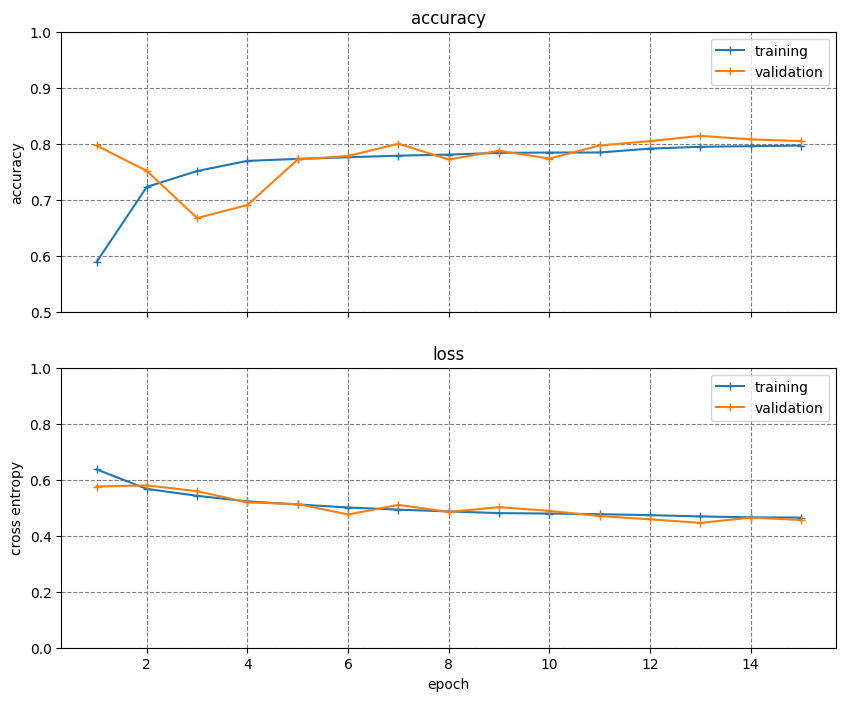

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,8), sharex=True)

x_plot = np.arange(1, initial_epochs+1)

ax[0].plot(x_plot, acc, '+-', label='training')
ax[0].plot(x_plot, val_acc, '+-', label='validation')
ax[0].legend()
ax[0].set_ylabel('accuracy')
ax[0].set_ylim(0.5, 1)
ax[0].grid(ls='--', c='C7')
ax[0].set_title('accuracy')

ax[1].plot(x_plot, loss, '+-', label='training')
ax[1].plot(x_plot, val_loss, '+-', label='validation')
ax[1].legend()
ax[1].set_ylabel('cross entropy')
ax[1].set_ylim(0, 1)
ax[1].grid(ls='--', c='C7')
ax[1].set_title('loss')
ax[1].set_xlabel('epoch')

plt.show()

In [22]:
# unfreeze the layers
pretrained_model.trainable = True

# let's take a look to see how many layers are in the base model
print("Number of layers in the pre-trained model: ", len(pretrained_model.layers))

Number of layers in the pre-trained model:  175


In [23]:
# fine-tune from this layer onwards
fine_tune_at = 15


# Freeze all the layers before the `fine_tune_at` layer
for layer in pretrained_model.layers[:fine_tune_at]:
  layer.trainable = False

In [24]:
base_learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1*base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 1)                 2049      
                                                                 
Total params: 23589761 (89.99 MB)
Trainable params: 23452417 (89.46 MB)
Non-trainable params: 137344 (536.50 KB)
_________________________________________________________________


In [25]:
fine_tune_epochs = 40
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_batches_ds,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1]+1,
                         validation_data=val_batches_ds,
                         validation_steps=validation_steps)

Epoch 16/55
342/342 [==============================] - 62s 60ms/step - loss: 2.4603 - accuracy: 0.9071 - val_loss: 5.8049 - val_accuracy: 0.5078
Epoch 17/55
342/342 [==============================] - 28s 56ms/step - loss: 0.2298 - accuracy: 0.9693 - val_loss: 10.9737 - val_accuracy: 0.5188
Epoch 18/55
342/342 [==============================] - 28s 56ms/step - loss: 0.1091 - accuracy: 0.9821 - val_loss: 9.1984 - val_accuracy: 0.5797
Epoch 19/55
342/342 [==============================] - 28s 56ms/step - loss: 0.0818 - accuracy: 0.9848 - val_loss: 0.0734 - val_accuracy: 0.9719
Epoch 20/55
342/342 [==============================] - 28s 56ms/step - loss: 0.0429 - accuracy: 0.9894 - val_loss: 0.1868 - val_accuracy: 0.9734
Epoch 21/55
342/342 [==============================] - 28s 56ms/step - loss: 0.0579 - accuracy: 0.9875 - val_loss: 0.2046 - val_accuracy: 0.9703
Epoch 22/55
342/342 [==============================] - 29s 57ms/step - loss: 0.0416 - accuracy: 0.9902 - val_loss: 0.0899 - val_a

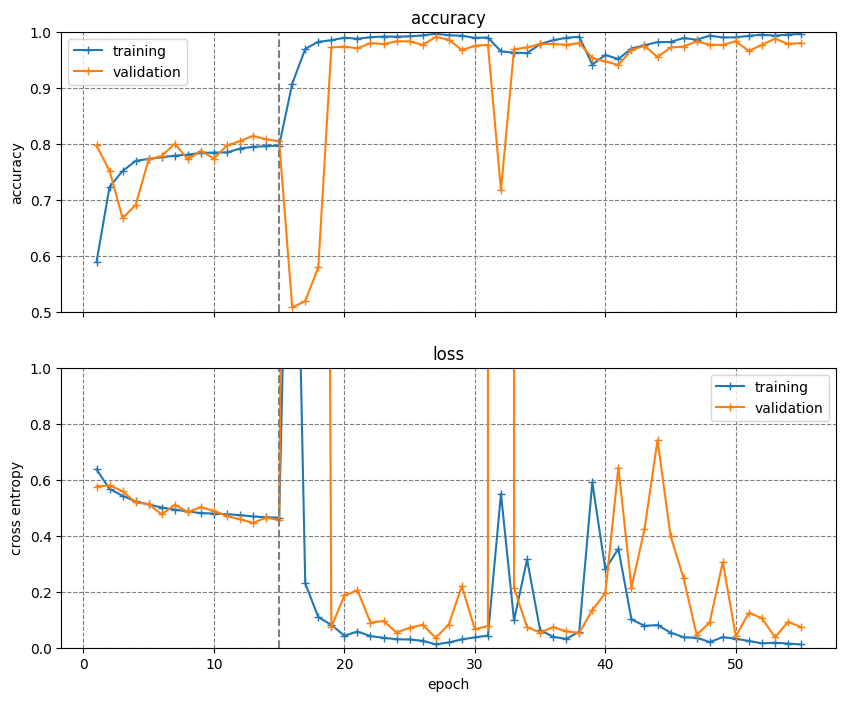

In [26]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,8), sharex=True)

x_plot = np.arange(1, total_epochs+1)

ax[0].plot(x_plot, acc, '+-', label='training')
ax[0].plot(x_plot, val_acc, '+-', label='validation')
ax[0].legend()
ax[0].set_ylabel('accuracy')
ax[0].set_ylim(0.5, 1)
ax[0].grid(ls='--', c='C7')
ax[0].set_title('accuracy')
ax[0].axvline(initial_epochs, c='C7', ls='--')

ax[1].plot(x_plot, loss, '+-', label='training')
ax[1].plot(x_plot, val_loss, '+-', label='validation')
ax[1].legend()
ax[1].set_ylabel('cross entropy')
ax[1].set_ylim(0, 1)
ax[1].grid(ls='--', c='C7')
ax[1].set_title('loss')
ax[1].set_xlabel('epoch')
ax[1].axvline(initial_epochs, c='C7', ls='--')

plt.show()

In [27]:
val_loss, val_accuracy = model.evaluate(val_batches_ds)

63/63 [==============================] - 3s 25ms/step - loss: 0.0717 - accuracy: 0.9810


In [28]:
test_loss, test_accuracy = model.evaluate(test_batches_ds)

282/282 [==============================] - 13s 20ms/step - loss: 0.0731 - accuracy: 0.9790


In [29]:
# extract images and labels from the batches, and store predictions
eval_labels = np.array([])
eval_predictions = np.array([])
first = True
for images, labels in test_batches_ds.take(-1):  # take all the batches
    if first:
        eval_images = images.numpy()
        first = False
    else:
        eval_images = np.concatenate((eval_images, images.numpy()), axis=0)
    eval_labels = np.append(eval_labels, labels.numpy())
    # Directly append the predictions without converting to numpy
    eval_predictions = np.append(eval_predictions, model.predict_on_batch(images))

# convert predictions from logit to binary
eval_predictions[eval_predictions >= 0] = 1
eval_predictions[eval_predictions < 0] = 0

# change dtype to int
eval_predictions = eval_predictions.astype(int)
eval_labels = eval_labels.astype(int)

# check that we extracted the images and the labels correctly
print("eval_images      : ", eval_images.shape)
print("eval_labels      : ", eval_labels.shape)
print("eval_predictions : ", eval_predictions.shape)

eval_images      :  (9000, 128, 128, 3)
eval_labels      :  (9000,)
eval_predictions :  (9000,)


In [42]:
from sklearn.metrics import confusion_matrix
confusion_mtx = confusion_matrix(eval_labels, eval_predictions)

rearranged_matrix = np.array([[confusion_mtx[1, 1], confusion_mtx[0, 1]],
                              [confusion_mtx[1, 0], confusion_mtx[0, 0]]])

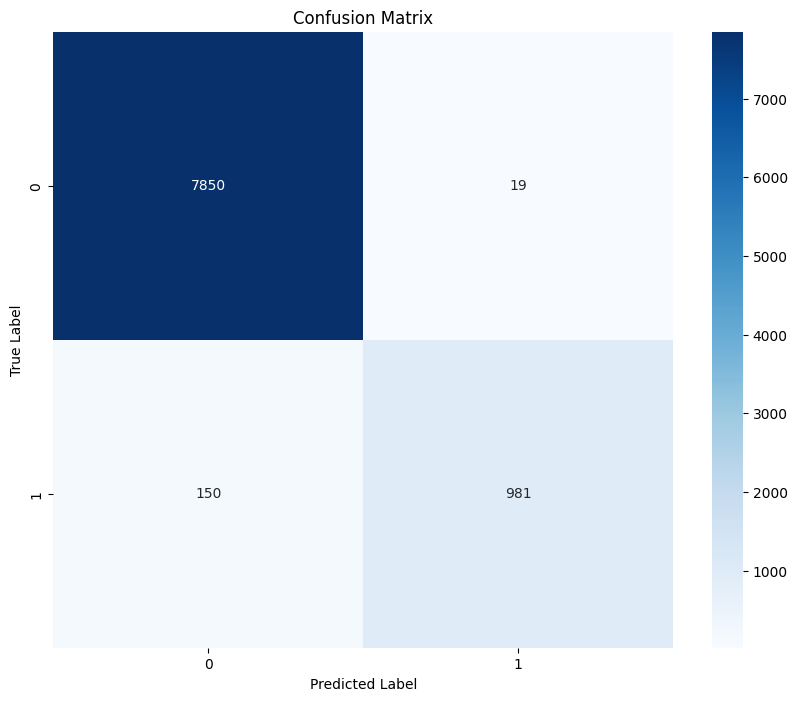

In [43]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(rearranged_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [32]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, auc

# ROC AUC Score
roc_auc = roc_auc_score(eval_labels, eval_predictions)

# Calculate ROC Curve
fpr, tpr, _ = roc_curve(eval_labels, eval_predictions)

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(eval_labels, eval_predictions)

# PR AUC Score
pr_auc = auc(recall, precision)

# Print ROC and PR AUC scores
print("ROC AUC Score:", roc_auc)
print("PR AUC Score:", pr_auc)

ROC AUC Score: 0.981125
PR AUC Score: 0.997751064302961


In [35]:
from sklearn.metrics import f1_score

TN = confusion_mtx[0,0]
FN = confusion_mtx[1,0]
TP = confusion_mtx[1,1]
FP = confusion_mtx[0,1]
F1 = f1_score(eval_labels, eval_predictions)

print('accuracy = {:.4f}'.format((TP+TN)/np.sum(confusion_mtx)))
print('positive recall = {:.4f}'.format(TP/(TP+FN)))
print('negative recall = {:.4f}'.format(TN/(TN+FP)))
print('positive precision = {:.4f}'.format(TP/(TP+FP)))
print('negative precision = {:.4f}'.format(TN/(TN+FN)))
print('F1 Score: = {:.4f}'.format(F1))

accuracy = 0.9812
positive recall = 0.9812
negative recall = 0.9810
positive precision = 0.9976
negative precision = 0.8674
F1 Score: = 0.9894


In [34]:
model.save_weights('resnet50_transfer_learning.h5')

In [45]:
#now satellite images
!tar -xvf "/content/drive/MyDrive/DS/deep_learning/Project/test_images_labels_targets.tar"

Streaming output truncated to the last 5000 lines.
test/labels/midwest-flooding_00000210_pre_disaster.json
test/labels/mexico-earthquake_00000080_pre_disaster.json
test/labels/socal-fire_00000558_pre_disaster.json
test/labels/hurricane-matthew_00000297_pre_disaster.json
test/labels/palu-tsunami_00000139_post_disaster.json
test/labels/hurricane-harvey_00000164_pre_disaster.json
test/labels/socal-fire_00000379_post_disaster.json
test/labels/socal-fire_00001222_post_disaster.json
test/labels/socal-fire_00000882_pre_disaster.json
test/labels/hurricane-matthew_00000076_pre_disaster.json
test/labels/socal-fire_00000823_pre_disaster.json
test/labels/hurricane-florence_00000005_pre_disaster.json
test/labels/socal-fire_00000646_post_disaster.json
test/labels/socal-fire_00001220_post_disaster.json
test/labels/hurricane-harvey_00000328_pre_disaster.json
test/labels/socal-fire_00000749_post_disaster.json
test/labels/hurricane-florence_00000253_pre_disaster.json
test/labels/socal-fire_00001240_pre_

In [47]:
def extract_info_from_filename(file_name):
    # Split the filename and extract the required parts
    parts = file_name.split('_')
    if len(parts) >= 3:
        disaster_type = parts[0]  # e.g., 'hurricane' from 'hurricane-florence_00000186_pre_disaster.png'
        label = '_'.join(parts[-2:])  # e.g., 'pre_disaster' or 'post_disaster'
        return disaster_type, label
    else:
        return None, None

def load_images_real_data(path, x, y):
    imgs = []
    labels = []
    types = []

    for img_file in os.listdir(path):
            if img_file.endswith('.png'):
                # Extract disaster type and label from filename
                disaster_type, label = extract_info_from_filename(img_file)

                # Load the image
                img_path = os.path.join(path, img_file)
                img = Image.open(img_path).convert('RGB')
                img = img.resize((x, y))
                imgs.append(np.array(img))

                # Append label and coordinates
                labels.append(label)
                types.append(disaster_type)

                del img

    return np.array(imgs), np.array(labels), np.array(types)

In [58]:
satellitePath = '/content/test/images'

x_real,label_real,type_real =load_images_real_data(satellitePath,128,128)

In [59]:
x_real_org,_,_ =load_images_real_data(satellitePath,1024,1024)

In [60]:
hurricane_indices = [idx for idx, type in enumerate(type_real) if type.startswith('hurricane')]

In [61]:
x_real_hurricane,label_real_hurricane,type_real_hurricane = x_real[hurricane_indices],label_real[hurricane_indices],type_real[hurricane_indices]

In [62]:
x_real_org_hurricane = x_real_org[hurricane_indices]

In [63]:
y_pred_real = model.predict(x_real_hurricane)
label_map = {0: 'damage', 1: 'no_damage'}
y_pred_binary_real = np.argmax(y_pred_real, axis=1)
mapped_predictions = [label_map[pred] for pred in y_pred_binary_real]

25/25 [==============================] - 2s 31ms/step


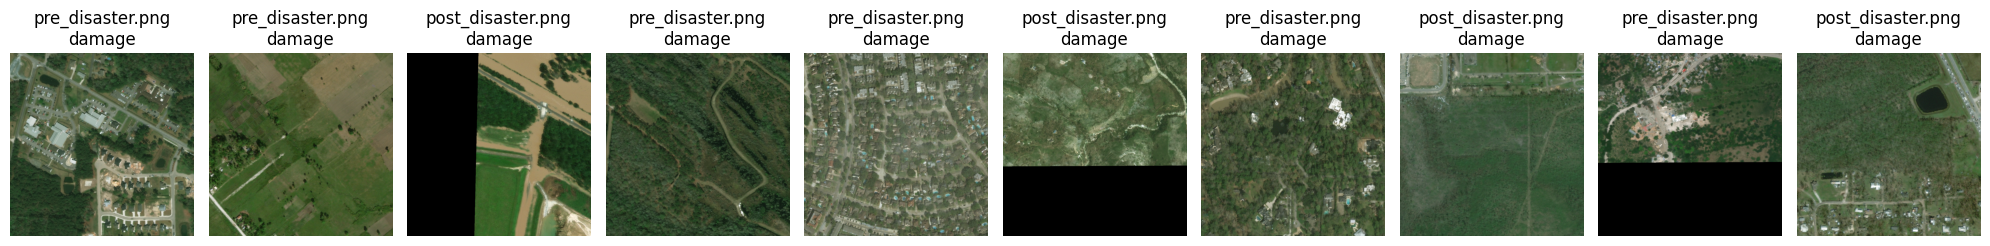

In [65]:
def display_random_samples_real(images, labels, predicted_labels, num_samples=10):
    if num_samples > len(images):
        print("Number of samples requested exceeds the total number of images. Displaying all images instead.")
        num_samples = len(images)

    # Randomly select images and their corresponding labels
    random_indices = random.sample(range(len(images)), num_samples)
    selected_images = [images[i] for i in random_indices]
    selected_labels = [labels[i] for i in random_indices]
    selected_predicted_labels = [predicted_labels[i] for i in random_indices]

    # Set up the subplot grid
    fig, axes = plt.subplots(1, num_samples, figsize=(num_samples * 2, 4))

    if num_samples == 1:  # If only one sample, axes is not a list
        axes = [axes]

    for ax, img, label, pred_label in zip(axes, selected_images, selected_labels, selected_predicted_labels):
        ax.imshow(img)
        ax.set_title(f"{label}\n{pred_label}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()
display_random_samples_real(x_real_org_hurricane,label_real_hurricane,mapped_predictions)